<a href="https://colab.research.google.com/github/gyzo-dev/LE1_Maligalig_MA/blob/main/LE1_Maligalig_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

Initialize data set from UCI

In [4]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/551/data.csv')

data.head()

year      AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0  2011  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67   
1  2011  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67   
2  2011  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10   
3  2011  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03   
4  2011  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67   

      CDP       CO     NOX  
0  11.898  0.32663  81.952  
1  11.892  0.44784  82.377  
2  12.042  0.45144  83.776  
3  11.990  0.23107  82.505  
4  11.910  0.26747  82.028

In [5]:
data.shape

(36733, 12)

In [6]:
data.describe()

year            AT            AP            AH          AFDP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    2012.985735     17.712726   1013.070165     77.867015      3.925518   
std        1.418965      7.447451      6.463346     14.461355      0.773936   
min     2011.000000     -6.234800    985.850000     24.085000      2.087400   
25%     2012.000000     11.781000   1008.800000     68.188000      3.355600   
50%     2013.000000     17.801000   1012.600000     80.470000      3.937700   
75%     2014.000000     23.665000   1017.000000     89.376000      4.376900   
max     2015.000000     37.103000   1036.600000    100.200000      7.610600   

               GTEP           TIT           TAT           TEY           CDP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      25.563801   1081.428084    546.158517    133.506404     12.060525   
std        4.195957     17.536373      6.842360     15.618634      1.088795   
min       17.698000   1000.800000    511.040000    100.020000      9.851800   
25%       23.129000   1071.800000    544.720000    124.450000     11.435000   
50%       25.104000   1085.900000    549.880000    133.730000     11.965000   
75%       29.061000   1097.000000    550.040000    144.080000     12.855000   
max       40.716000   1100.900000    550.610000    179.500000     15.159000   

                 CO           NOX  
count  36733.000000  36733.000000  
mean       2.372468     65.293067  
std        2.262672     11.678357  
min        0.000388     25.905000  
25%        1.182400     57.162000  
50%        1.713500     63.849000  
75%        2.842900     71.548000  
max       44.103000    119.910000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    36733 non-null  int64  
 1   AT      36733 non-null  float64
 2   AP      36733 non-null  float64
 3   AH      36733 non-null  float64
 4   AFDP    36733 non-null  float64
 5   GTEP    36733 non-null  float64
 6   TIT     36733 non-null  float64
 7   TAT     36733 non-null  float64
 8   TEY     36733 non-null  float64
 9   CDP     36733 non-null  float64
 10  CO      36733 non-null  float64
 11  NOX     36733 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


Cleaning the data

In [8]:
data.isnull().sum()*100/data.shape[0]

year    0.0
AT      0.0
AP      0.0
AH      0.0
AFDP    0.0
GTEP    0.0
TIT     0.0
TAT     0.0
TEY     0.0
CDP     0.0
CO      0.0
NOX     0.0
dtype: float64

In [9]:
data.loc[data.duplicated()]

year      AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
26399  2014  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01   
26400  2014  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01   
26401  2014  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01   
26402  2014  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01   
27389  2014  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14   
27390  2014  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14   
27391  2014  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14   

          CDP      CO     NOX  
26399  11.835  1.7056  47.352  
26400  11.835  1.7056  47.352  
26401  11.835  1.7056  47.352  
26402  11.835  1.7056  47.352  
27389  13.038  1.3163  52.564  
27390  13.038  1.3163  52.564  
27391  13.038  1.3163  52.564

In [10]:
data = data.drop_duplicates()

In [11]:
data.loc[data.duplicated()]

Empty DataFrame
Columns: [year, AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

Analyzing the data

In [12]:
data.columns

Index(['year', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP',
       'CO', 'NOX'],
      dtype='object')

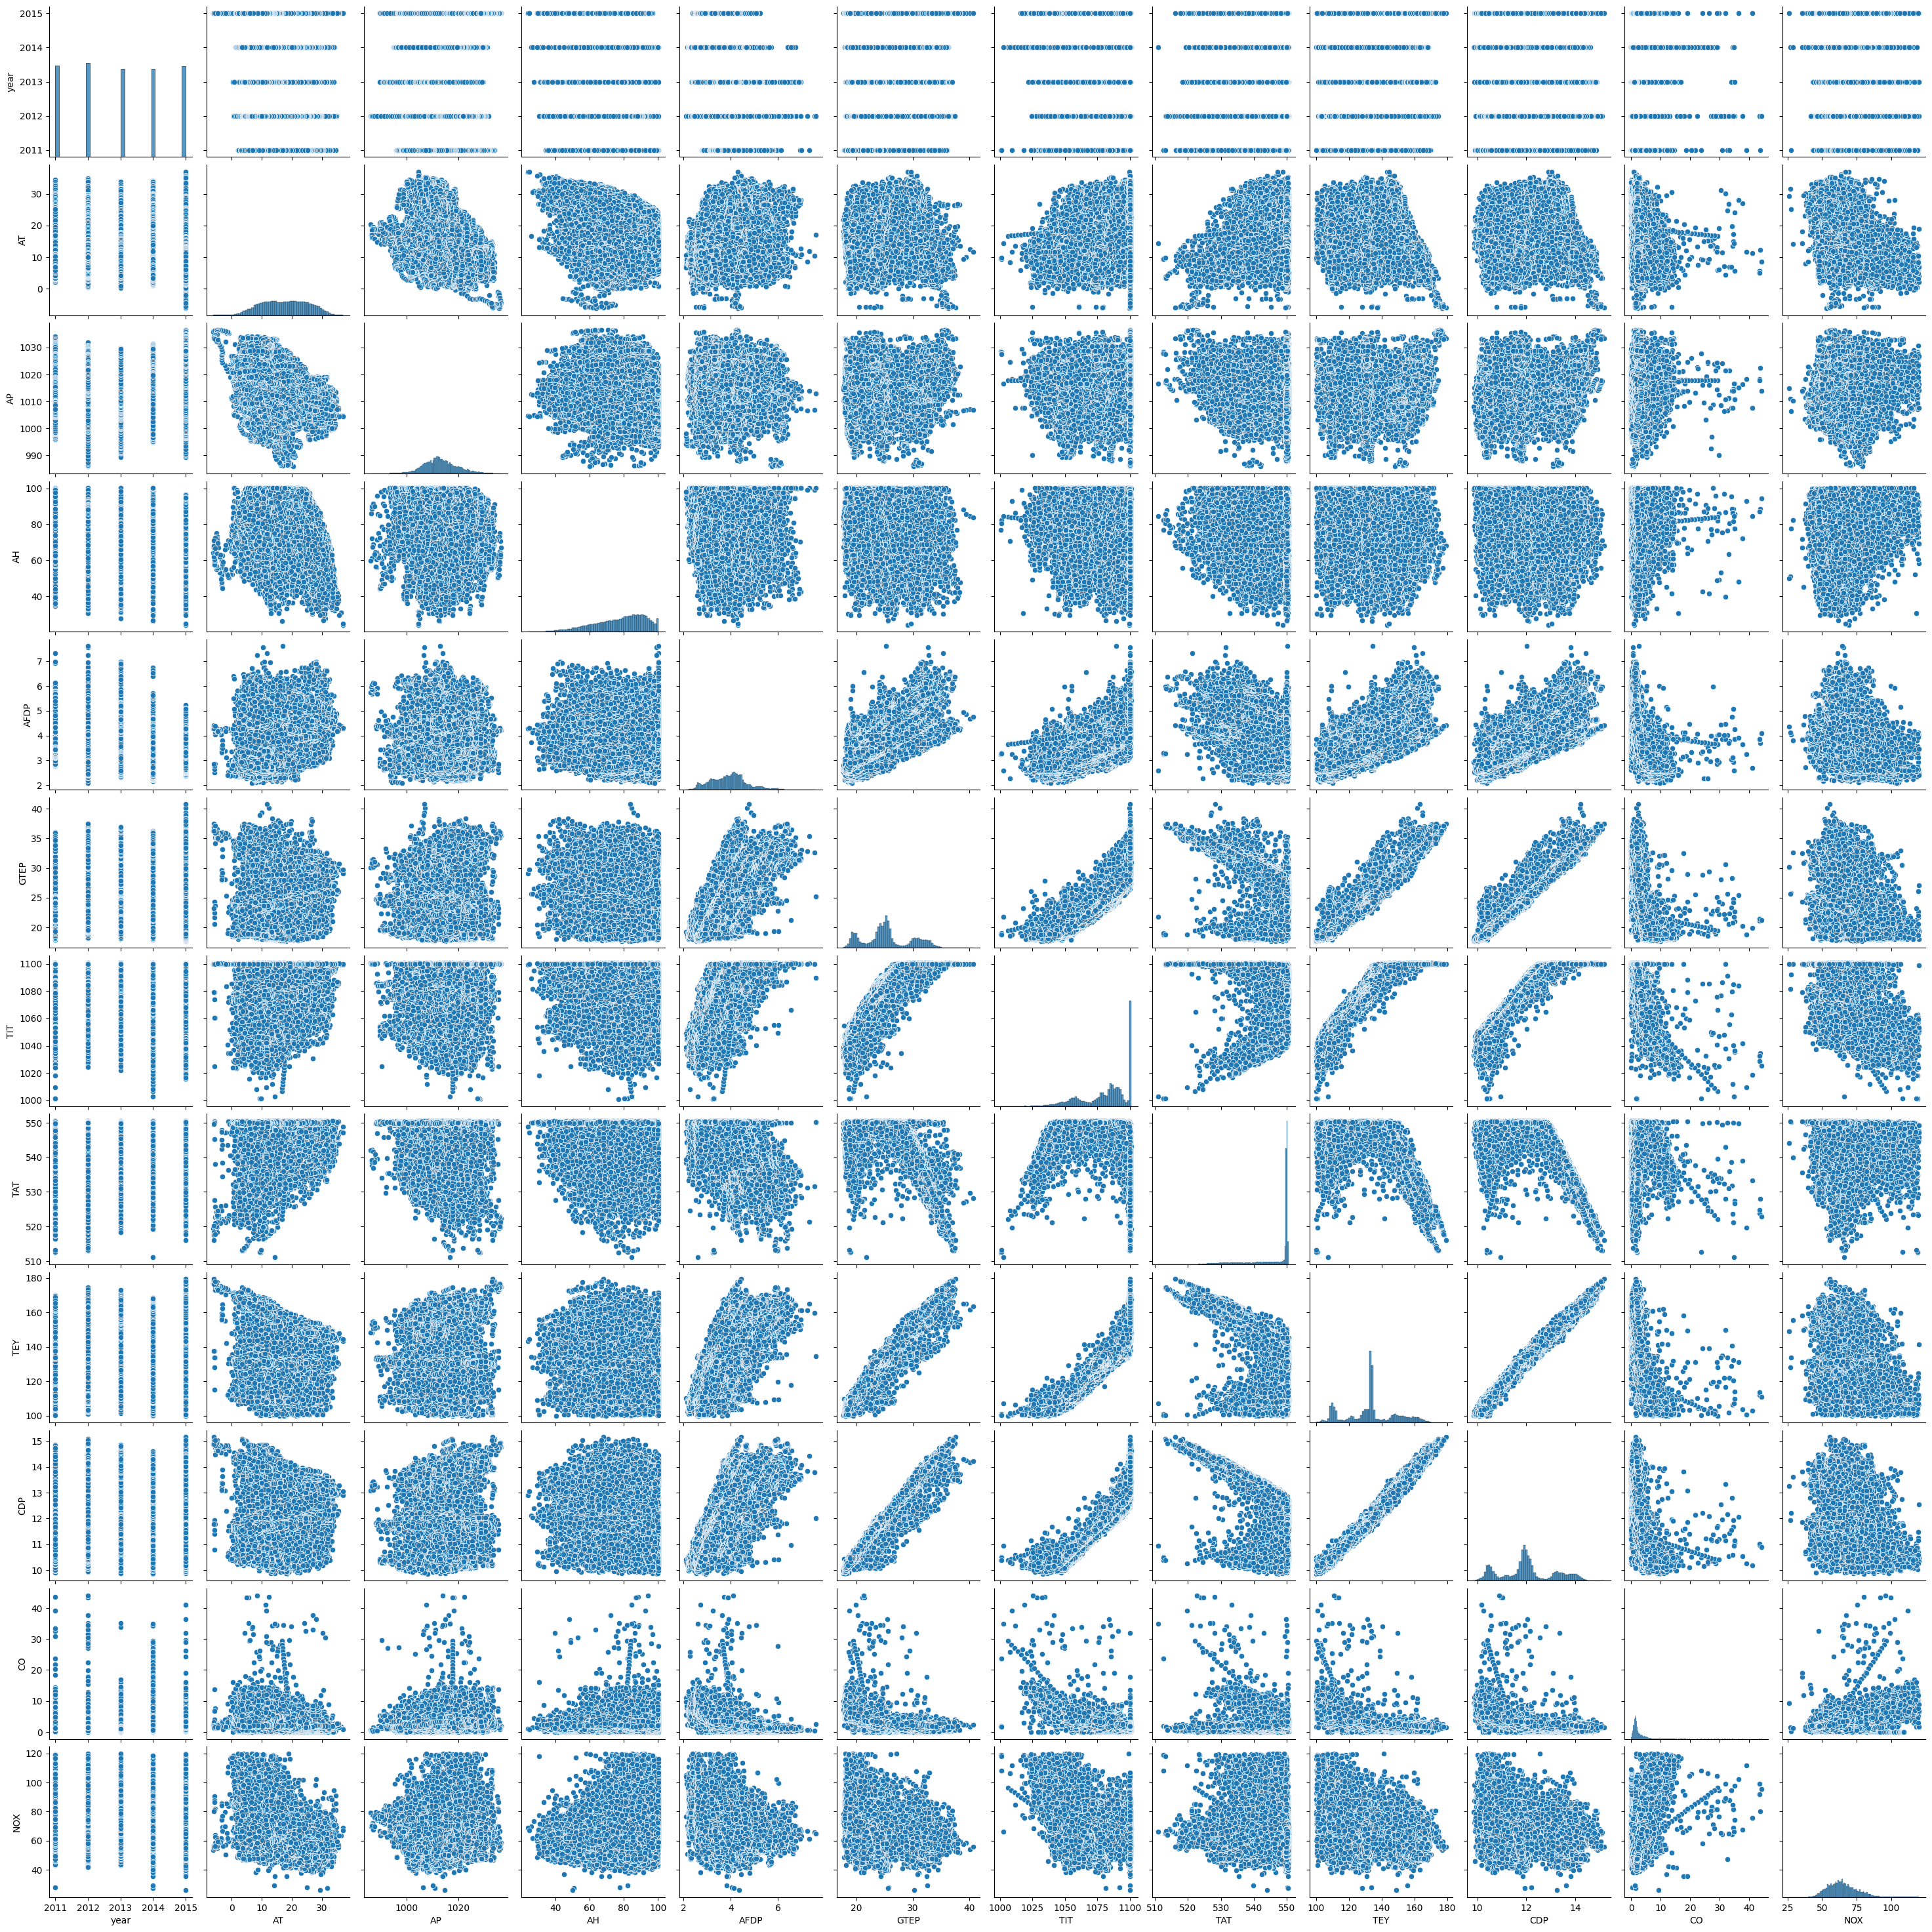

In [13]:
sns.pairplot(data)

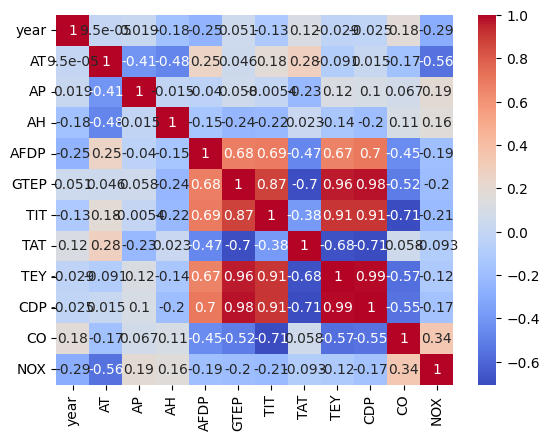

In [14]:
data_numbers = data.select_dtypes(include='number')
sns.heatmap(data_numbers.corr(), cmap="coolwarm", annot = True)
plt.show()

The y variable chosen is the Turbine energy yield (TEY), while the x variables that was chosen due to a strong positive correlation were the Compressor discharge pressure (CDP), the Gas turbine exhaust pressure (GTEP), and the Turbine inlet temperature (TIT)

In [23]:
X = data[['CDP', 'GTEP', 'TIT']]
y = data['TEY']

MODEL 1 - Compressor discharge pressure (CDP) vs Turbine energy yield (TEY)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [25]:
X_train.head(10)

CDP    GTEP     TIT
11026  10.683  20.352  1059.4
34595  12.006  24.708  1080.4
20553  11.918  24.955  1088.2
11281  12.263  26.220  1094.1
434    13.796  31.959  1099.9
28195  11.242  22.456  1066.2
10993  12.306  26.843  1095.4
7900   11.836  23.888  1084.9
6265   11.891  24.138  1087.0
21496  10.307  19.115  1052.4

In [26]:
y_train.head(10)

11026    111.32
34595    129.31
20553    132.89
11281    134.75
434      157.31
28195    120.35
10993    133.79
7900     133.60
6265     133.71
21496    109.49
Name: TEY, dtype: float64

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

print('Linear Regression Results: ')
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))

Linear Regression Results: 
Mean Squared Error:  5.2171383928072
Root Mean Squared Error:  2.2841056001873468
R2:  0.9786595940042933


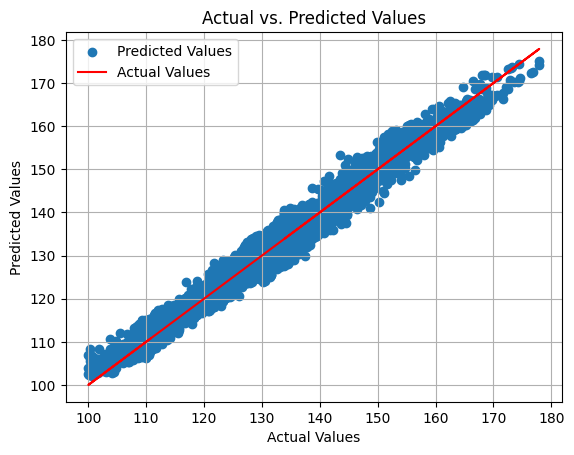

In [65]:
plt.scatter(y_test, y_pred, label='Predicted Values')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

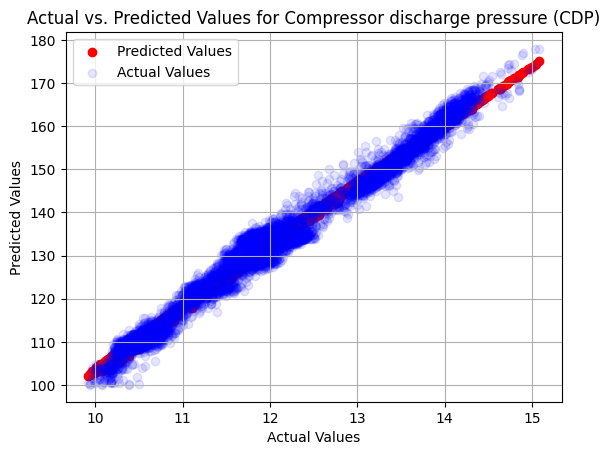

In [75]:
plt.scatter(X_test['CDP'], y_pred, color='red', label='Predicted Values')
plt.scatter(X_test['CDP'], y_test, color='blue', alpha=0.1, label='Actual Values')
plt.title('Actual vs. Predicted Values for Compressor discharge pressure (CDP)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

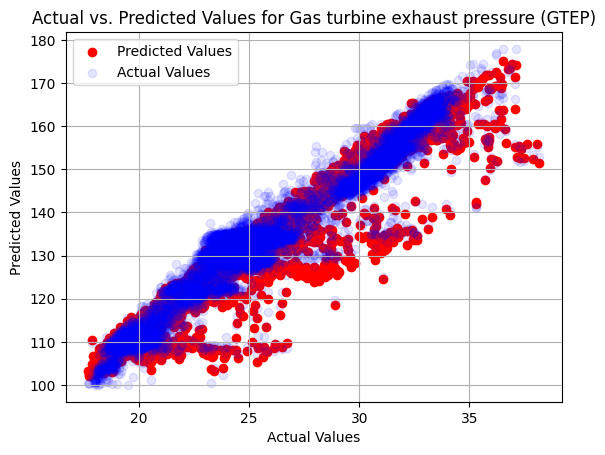

In [76]:
plt.scatter(X_test['GTEP'], y_pred, color='red', label='Predicted Values')
plt.scatter(X_test['GTEP'], y_test, color='blue', alpha=0.1, label='Actual Values')
plt.title('Actual vs. Predicted Values for Gas turbine exhaust pressure (GTEP)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

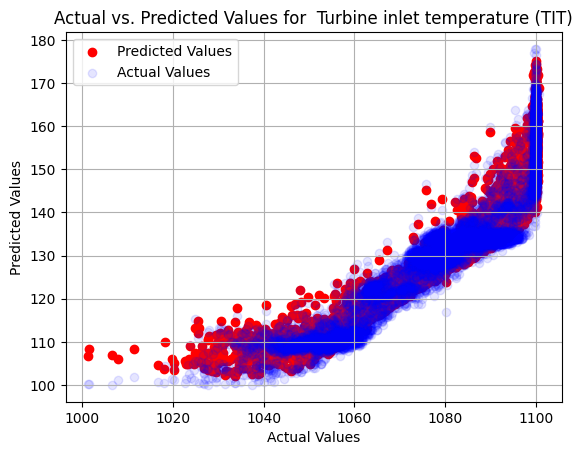

In [77]:
plt.scatter(X_test['TIT'], y_pred, color='red', label='Predicted Values')
plt.scatter(X_test['TIT'], y_test, color='blue', alpha=0.1, label='Actual Values')
plt.title('Actual vs. Predicted Values for  Turbine inlet temperature (TIT)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
print("R-squared score:", r2_score(y_test, y_pred))

R-squared score: 0.9786595940042933


In [79]:
import pickle
import shutil

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

shutil.copy('model.pkl', '/content/drive/My Drive/ML')

'/content/drive/My Drive/ML/model.pkl'